# L2 Regularization 練習

## Loading the iris data

In [64]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [65]:
iris = datasets.load_iris()
x = iris.data[:, [2,3]]
y = iris.target

## feature scaling

* 做一下feature scaling可以讓Regularization做得更好
 - ref. python machine learning, p.92
 - Regularization is another reason why feature scaling such as standardization is important. 
 - For regularization to work properly,
 - we need to ensure that all our features are on comparable scales.

* feature scaling
 - http://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2016/Lecture/Gradient%20Descent%20(v2).pdf#page=21

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)
x_std = sc.transform(x)

print np.mean(x_std)
print np.std(x_std)

4.73695157173e-17
1.0


##  L2

- 李宏毅講的，可以上去YouTube聽一聽
- http://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2016/Lecture/DNN%20tip.pdf#page=33


- 如果你已經在traning data上得到夠好的結果，但是你在testing data上結果仍然不好
- 比較典型的作法有early stoping和regularization


- early stoping
- 如果今天你的learning rate調的對得話，你的loss會越來越小
- traning set 和 testing set的分佈是不一樣的，我們其實會用validation set來verify這件事情(停在testing set不在下降的點上)
- validation set loss最小的時候，traning set就停下來


- regularization
- 我們重新定義了，我們要去minimize的那個loss function
- L2 每次在udpate參數之前，參數w會乘上(1-eta*lambda)，eta是learning rate，lambda是regularization strength，這兩個通常都會設很小的值
- 譬如說今天在udpate參數之前都先乘上0.99，每次都會讓你的參數越來越接近0
- 我們用L2的時候呢，每次都會讓weight小一點小一點，所以也叫做weight decay
- L1 參數是正的就減掉一些，參數是負的就加上一些

- L1和L2都是讓參數變小，但略有不同，L1每次都減掉一個固定的值，L2每次都乘上一個小於1固定的值
- 如果今天w是一百萬，L2是你乘上0.99其實是把w減掉一個很大的值，但對L1來說減掉的值都是固定的
- L2對於很大的w下降很快，L1不管w很大或很小都降某個值，你可能train完model後，裡面還會有一些很大很大的w
- L2會保留很多train出來w是0的值
- L1不會保留很多train出來w是0的值 (結果會比較sparse，sparse是說裡面有很多w值是0)
- L2 train出來的值是平均都比較小


- 參數值比較接近0的function是比較平滑的




- code: https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch03/ch03.ipynb
- help: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [67]:
# 要注意這裡的C是 1/lambda (Inverse of regularization strength)
# C is directly related to the regularization parameter , which is its inverse

from sklearn.linear_model import LogisticRegression
weights, params = [], []
weights2, params2 = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10**c, random_state=0)
    
    # 有feature scaling
    lr.fit(x_std, y)
    weights.append(lr.coef_[1])
    params.append(10**c)
    print 'C = %f, score = %f' % (10**c, lr.score(x_std, y))
    
    # 沒有feature scaling
    lr.fit(x, y)
    weights2.append(lr.coef_[1])
    params2.append(10**c)
    
print type(weights)
print 'convert list to array'
weights = np.array(weights)
weights2 = np.array(weights2)

C = 0.000010, score = 0.666667
C = 0.000100, score = 0.666667
C = 0.001000, score = 0.666667
C = 0.010000, score = 0.666667
C = 0.100000, score = 0.800000
C = 1.000000, score = 0.940000
C = 10.000000, score = 0.960000
C = 100.000000, score = 0.953333
C = 1000.000000, score = 0.960000
C = 10000.000000, score = 0.960000
<type 'list'>
convert list to array


### C越大model越不平滑 (反之lambda越大model越平滑)

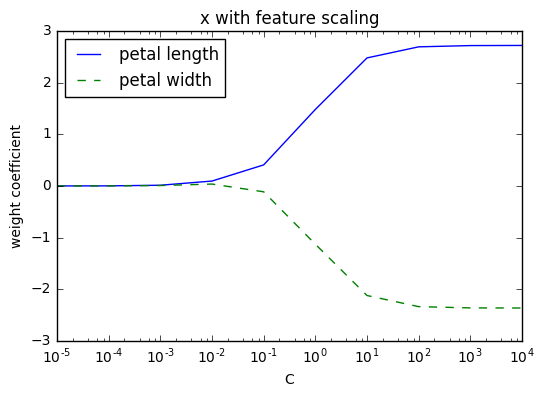

In [68]:
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], '--', label='petal width')
plt.legend(loc='upper left')
plt.title('x with feature scaling')
plt.xlabel('C')
plt.ylabel('weight coefficient')
plt.xscale('log')
plt.show()

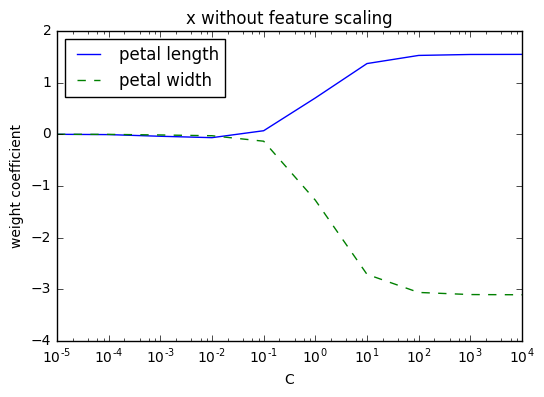

In [69]:
plt.plot(params, weights2[:, 0], label='petal length')
plt.plot(params, weights2[:, 1], '--', label='petal width')
plt.legend(loc='upper left')
plt.title('x without feature scaling')
plt.xlabel('C')
plt.ylabel('weight coefficient')
plt.xscale('log')
plt.show()

### 這個function更方便，只要餵進C的list，用cross validation幫你選好最好的C了

In [78]:
from sklearn.linear_model import LogisticRegressionCV
a = [10**c for c in np.arange(-5,5)]
lr2 = LogisticRegressionCV(a)
lr2.fit(x_std, y)
lr2.score(x_std, y)

0.96666666666666667